In [1]:
!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [2]:
from datasets import load_dataset

dataset = load_dataset("Artificio/WikiArt")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/103250 [00:00<?, ? examples/s]

In [3]:
# Print basic information about the dataset
print("Dataset Structure: ", dataset)
print("Dataset Splits: ", dataset.keys())

# Example to access one of the splits
print("Number of samples in 'train' split: ", dataset["train"].num_rows)


Dataset Structure:  DatasetDict({
    train: Dataset({
        features: ['title', 'artist', 'date', 'genre', 'style', 'description', 'filename', 'image', 'embeddings_pca512'],
        num_rows: 103250
    })
})
Dataset Splits:  dict_keys(['train'])
Number of samples in 'train' split:  103250


In [4]:
for i in range(5):  # adjust the range as needed to see more or fewer examples
    print(dataset['train'][i])


{'title': 'Cornelia Street', 'artist': 'John French Sloan', 'date': '1920', 'genre': 'cityscape', 'style': 'New Realism', 'description': 'John French Sloan / Cornelia Street / New Realism / cityscape / 1920', 'filename': '0.jpg', 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7D3C600D9990>, 'embeddings_pca512': [-37.40167999267578, -87.52667236328125, 42.48488235473633, -60.555171966552734, 69.24334716796875, 64.89490509033203, -13.862542152404785, -22.90911293029785, 33.39680480957031, 4.503255367279053, 40.05317306518555, -21.32126808166504, -10.14204216003418, -61.7667236328125, -8.394667625427246, 1.3588029146194458, 46.075408935546875, 21.551063537597656, 39.094970703125, -37.10438537597656, -0.09842237830162048, 15.846840858459473, 12.409345626831055, 21.888248443603516, 5.111203670501709, -17.49536895751953, -21.008153915405273, 49.00922393798828, 8.426753044128418, -20.033618927001953, 4.312302589416504, -13.815532684326172, -26.18567657470703, 25.

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import io

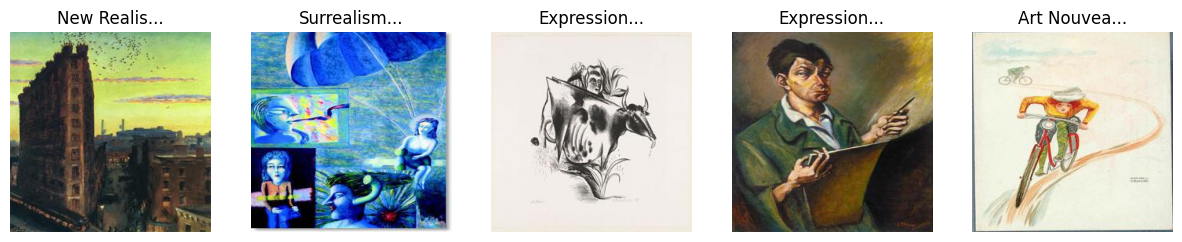

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Adjust the subplot grid as needed
for i, ax in enumerate(axes.flat):
    entry = dataset['train'][i]  # Adjust dataset split if necessary
    ax.imshow(entry['image'])
    ax.set_title(entry['style'][:10] + "...")  # Shortening title if too long
    ax.axis('off')  # Hide axes
plt.show()


In [7]:
import pandas as pd
import os

In [8]:
images_dir = '/content/images'
os.makedirs(images_dir, exist_ok=True)


In [9]:
image_data = []

In [10]:
'''
from collections import defaultdict

# Initialize a dictionary to count occurrences of each style
style_counts = defaultdict(int)
image_data = []  # Assuming you want to start with an empty list
unique_styles = set()


for i in range(103250):  # Adjust the range as needed based on your dataset size
    entry = dataset['train'][i]  # Access the i-th entry in the training dataset

    # Generate a filename by replacing spaces and slashes in the title
    image_filename = f"{i}_{entry['title'].replace(' ', '_').replace('/', '_')}.jpg"
    image_path = os.path.join(images_dir, image_filename)

    # Save the image at the computed path
    entry['image'].save(image_path)

    # Append details to the image_data list for later use or analysis
    image_data.append({'Index': i, 'Filename': image_filename, 'Style': entry['style']})

    # Add the style to the set of unique styles
    unique_styles.add(entry['style'])

    # Increment the count for this style in the style_counts dictionary
    style_counts[entry['style']] += 1

# Print or return the count of items per style
print(style_counts)
'''

'\nfrom collections import defaultdict\n\n# Initialize a dictionary to count occurrences of each style\nstyle_counts = defaultdict(int)\nimage_data = []  # Assuming you want to start with an empty list\nunique_styles = set()\n\n\nfor i in range(103250):  # Adjust the range as needed based on your dataset size\n    entry = dataset[\'train\'][i]  # Access the i-th entry in the training dataset\n\n    # Generate a filename by replacing spaces and slashes in the title\n    image_filename = f"{i}_{entry[\'title\'].replace(\' \', \'_\').replace(\'/\', \'_\')}.jpg"\n    image_path = os.path.join(images_dir, image_filename)\n\n    # Save the image at the computed path\n    entry[\'image\'].save(image_path)\n\n    # Append details to the image_data list for later use or analysis\n    image_data.append({\'Index\': i, \'Filename\': image_filename, \'Style\': entry[\'style\']})\n\n    # Add the style to the set of unique styles\n    unique_styles.add(entry[\'style\'])\n\n    # Increment the count 

In [11]:
'''
defaultdict(<class 'int'>, {'New Realism': 329, 'Surrealism': 4167, 'Expressionism': 7013,
'Art Nouveau (Modern)': 4899, 'Symbolism': 3476, 'Realism': 10523, 'Early Renaissance': 1351,
'Divisionism': 338, 'Romanticism': 9285, 'Post-Impressionism': 5778,
'Impressionism': 10643, 'Baroque': 4400, 'Naïve Art (Primitivism)': 2295, 'Fauvism': 731,
'Pointillism': 501, 'Pop Art': 791, 'Abstract Expressionism': 2074, 'Neo-Dada': 131,
'Art Informel': 1267, 'Abstract Art': 979, 'Luminism': 385, 'Neoclassicism': 2038,
'Cubism': 1747, 'Mannerism (Late Renaissance)': 1342, 'Op Art': 528, 'Neo-Rococo': 97,
'Neo-Expressionism': 420, 'Proto Renaissance': 273, 'Gongbi': 38, 'Neo-Romanticism': 566,
'Shin-hanga': 380, 'None': 986, 'Hard Edge Painting': 372, 'Minimalism': 460, 'Northern Renaissance': 2379,
'High Renaissance': 1314, 'Academicism': 972, 'Modernismo': 43, 'Ukiyo-e': 1426, 'Cloisonnism': 172,
'Precisionism': 284, 'Rococo': 2733, 'Classicism': 223, 'Intimism': 109, 'Magic Realism': 1002,
'American Realism': 277, 'Regionalism': 321, 'Lyrical Abstraction': 670, 'Purism': 159, 'Tachisme': 436,
'Synthetic Cubism': 187, 'Art Deco': 644, 'Action painting': 98, 'Native Art': 21, 'Futurism': 291,
'Tonalism': 202, 'Color Field Painting': 910, 'Orphism': 248, 'Neo-baroque': 105, 'Conceptual Art': 124,
'Romanesque': 55, 'Orientalism': 392, 'Sōsaku hanga': 369, 'Byzantine': 77, 'Concretism': 581,
'Ottoman Period': 72, 'Contemporary Realism': 309, 'Post-Painterly Abstraction': 169, 'Biedermeier': 132,
'Suprematism': 80, 'Analytical\xa0Realism': 89, 'Analytical Cubism': 87, 'Tubism': 21,
'Ink and wash painting': 545, 'Art Brut': 198, 'Socialist Realism': 95, 'Constructivism': 268,
'Nouveau Réalisme': 142, 'Social Realism': 305, 'Dada': 205, 'Neoplasticism': 173, 'Synthetism': 49,
'Naturalism': 435, 'Nanga (Bunjinga)': 58, 'Japonism': 118, 'Tenebrism': 221, 'New Casualism': 22,
 'Mechanistic Cubism': 69, 'Mosan art': 39, 'Poster Art Realism': 43, 'Metaphysical art': 192, 'Muralism': 149,
 'Lettrism': 33, 'International Gothic': 215, 'Cubo-Futurism': 137, 'Indian Space painting': 25,
 'Kitsch': 47, 'Primitivism': 36, 'Spatialism': 83, 'Renaissance': 1, 'Neo-Byzantine': 18,
 'Outsider art': 68, 'Cartographic Art': 10, 'New European Painting': 25, 'Zen': 94, 'Rayonism': 6,
 'Fantastic Realism': 31, 'Verism': 84, 'Miserablism': 8, 'Neo-Concretism': 44, 'Neo-Figurative Art': 27,
 'Cubo-Expressionism': 22, 'Ilkhanid': 2, 'Hyper-Realism': 49, 'Street art': 23, 'Automatic Painting': 37, 'Mail Art': 10, 'Figurative Expressionism': 19, 'Kinetic Art': 3, 'Feminist Art': 18, 'Existential Art': 17, 'Post-Minimalism': 31, 'Transautomatism': 74, 'Photorealism': 61, 'Light and Space': 11, 'Timurid Period': 17, 'Synchromism': 10, 'Nihonga': 29, 'Yamato-e': 12, 'Joseon Dynasty': 10, 'Environmental (Land) Art': 1, 'Safavid Period': 39, 'Gothic': 12, 'Nas-Taliq': 9, 'Spectralism': 5, 'Perceptism ': 6, 'Costumbrismo': 19})


import numpy as np

# Assuming `style_counts` is a dictionary with style names as keys and counts as values
counts = list(style_counts.values())

# Basic statistics
mean_count = np.mean(counts)
median_count = np.median(counts)
min_count = np.min(counts)
max_count = np.max(counts)

# Percentiles
percentiles = [10, 25, 50, 75, 90]  # Adjust these percentiles based on your needs
percentile_values = np.percentile(counts, percentiles)

print(f"Mean count of examples per style: {mean_count:.2f}")
print(f"Median count of examples per style: {median_count:.2f}")
print(f"Minimum count of examples per style: {min_count}")
print(f"Maximum count of examples per style: {max_count}")

# Print percentile information
for p, value in zip(percentiles, percentile_values):
    print(f"{p}th percentile: {value}")

# Suggested cutoff
cutoff = percentile_values[3]
print(f"Suggested cutoff for dropping classes: {cutoff}")
'''

'''
Mean count of examples per style: 753.65
Median count of examples per style: 137.00
Minimum count of examples per style: 1
Maximum count of examples per style: 10643
10th percentile: 11.600000000000001
25th percentile: 36.0
50th percentile: 137.0
75th percentile: 460.0
90th percentile: 1863.4000000000017
Suggested cutoff for dropping classes: 460.0
'''


'\nMean count of examples per style: 753.65\nMedian count of examples per style: 137.00\nMinimum count of examples per style: 1\nMaximum count of examples per style: 10643\n10th percentile: 11.600000000000001\n25th percentile: 36.0\n50th percentile: 137.0\n75th percentile: 460.0\n90th percentile: 1863.4000000000017\nSuggested cutoff for dropping classes: 460.0\n'

In [12]:
style_counts = {'New Realism': 329, 'Surrealism': 4167, 'Expressionism': 7013, 'Art Nouveau (Modern)': 4899, 'Symbolism': 3476, 'Realism': 10523, 'Early Renaissance': 1351, 'Divisionism': 338, 'Romanticism': 9285, 'Post-Impressionism': 5778, 'Impressionism': 10643, 'Baroque': 4400, 'Naïve Art (Primitivism)': 2295, 'Fauvism': 731, 'Pointillism': 501, 'Pop Art': 791, 'Abstract Expressionism': 2074, 'Neo-Dada': 131, 'Art Informel': 1267, 'Abstract Art': 979, 'Luminism': 385, 'Neoclassicism': 2038, 'Cubism': 1747, 'Mannerism (Late Renaissance)': 1342, 'Op Art': 528, 'Neo-Rococo': 97, 'Neo-Expressionism': 420, 'Proto Renaissance': 273, 'Gongbi': 38, 'Neo-Romanticism': 566, 'Shin-hanga': 380, 'None': 986, 'Hard Edge Painting': 372, 'Minimalism': 460, 'Northern Renaissance': 2379, 'High Renaissance': 1314, 'Academicism': 972, 'Modernismo': 43, 'Ukiyo-e': 1426, 'Cloisonnism': 172, 'Precisionism': 284, 'Rococo': 2733, 'Classicism': 223, 'Intimism': 109, 'Magic Realism': 1002, 'American Realism': 277, 'Regionalism': 321, 'Lyrical Abstraction': 670, 'Purism': 159, 'Tachisme': 436, 'Synthetic Cubism': 187, 'Art Deco': 644, 'Action painting': 98, 'Native Art': 21, 'Futurism': 291, 'Tonalism': 202, 'Color Field Painting': 910, 'Orphism': 248, 'Neo-baroque': 105, 'Conceptual Art': 124, 'Romanesque': 55, 'Orientalism': 392, 'Sōsaku hanga': 369, 'Byzantine': 77, 'Concretism': 581, 'Ottoman Period': 72, 'Contemporary Realism': 309, 'Post-Painterly Abstraction': 169, 'Biedermeier': 132, 'Suprematism': 80, 'Analytical\xa0Realism': 89, 'Analytical Cubism': 87, 'Tubism': 21, 'Ink and wash painting': 545, 'Art Brut': 198, 'Socialist Realism': 95, 'Constructivism': 268, 'Nouveau Réalisme': 142, 'Social Realism': 305, 'Dada': 205, 'Neoplasticism': 173, 'Synthetism': 49, 'Naturalism': 435, 'Nanga (Bunjinga)': 58, 'Japonism': 118, 'Tenebrism': 221, 'New Casualism': 22, 'Mechanistic Cubism': 69, 'Mosan art': 39, 'Poster Art Realism': 43, 'Metaphysical art': 192, 'Muralism': 149, 'Lettrism': 33, 'International Gothic': 215, 'Cubo-Futurism': 137, 'Indian Space painting': 25, 'Kitsch': 47, 'Primitivism': 36, 'Spatialism': 83, 'Renaissance': 1, 'Neo-Byzantine': 18, 'Outsider art': 68, 'Cartographic Art': 10, 'New European Painting': 25, 'Zen': 94, 'Rayonism': 6, 'Fantastic Realism': 31, 'Verism': 84, 'Miserablism': 8, 'Neo-Concretism': 44, 'Neo-Figurative Art': 27, 'Cubo-Expressionism': 22, 'Ilkhanid': 2, 'Hyper-Realism': 49, 'Street art': 23, 'Automatic Painting': 37, 'Mail Art': 10, 'Figurative Expressionism': 19, 'Kinetic Art': 3, 'Feminist Art': 18, 'Existential Art': 17, 'Post-Minimalism': 31, 'Transautomatism': 74, 'Photorealism': 61, 'Light and Space': 11, 'Timurid Period': 17, 'Synchromism': 10, 'Nihonga': 29, 'Yamato-e': 12, 'Joseon Dynasty': 10, 'Environmental (Land) Art': 1, 'Safavid Period': 39, 'Gothic': 12, 'Nas-Taliq': 9, 'Spectralism': 5, 'Perceptism ': 6, 'Costumbrismo': 19}

# Sort styles based on counts and select the top five
top_styles = sorted(style_counts.items(), key=lambda x: x[1], reverse=True)[:10]
print(top_styles)

[('Impressionism', 10643), ('Realism', 10523), ('Romanticism', 9285), ('Expressionism', 7013), ('Post-Impressionism', 5778), ('Art Nouveau (Modern)', 4899), ('Baroque', 4400), ('Surrealism', 4167), ('Symbolism', 3476), ('Rococo', 2733)]


In [13]:
'''
from collections import defaultdict
import os

# Assuming dataset and images_dir are defined
style_counts = defaultdict(int)
image_data = []

for i in range(103250):  # Example range, adjust based on actual dataset size
    entry = dataset['train'][i]
    style_counts[entry['style']] += 1

# Define cutoff based on earlier analysis
cutoff = 460
'''

"\nfrom collections import defaultdict\nimport os\n\n# Assuming dataset and images_dir are defined\nstyle_counts = defaultdict(int)\nimage_data = []\n\nfor i in range(103250):  # Example range, adjust based on actual dataset size\n    entry = dataset['train'][i]\n    style_counts[entry['style']] += 1\n\n# Define cutoff based on earlier analysis\ncutoff = 460\n"

In [14]:
'''
# Filter out styles that do not meet the cutoff
eligible_styles = {style for style, count in style_counts.items() if count >= cutoff}

# Now process the dataset again, only saving data for eligible styles
filtered_image_data = []
for i in range(103250):  # Adjust the range as needed based on your dataset size
    entry = dataset['train'][i]
    if entry['style'] in eligible_styles:
        # Generate a filename by replacing spaces and slashes in the title
        image_filename = f"{i}_{entry['title'].replace(' ', '_').replace('/', '_')}.jpg"
        image_path = os.path.join(images_dir, image_filename)

        # Save the image at the computed path
        entry['image'].save(image_path)

        # Append details to the filtered_image_data list
        filtered_image_data.append({'Index': i, 'Filename': image_filename, 'Style': entry['style']})
'''

'\n# Filter out styles that do not meet the cutoff\neligible_styles = {style for style, count in style_counts.items() if count >= cutoff}\n\n# Now process the dataset again, only saving data for eligible styles\nfiltered_image_data = []\nfor i in range(103250):  # Adjust the range as needed based on your dataset size\n    entry = dataset[\'train\'][i]\n    if entry[\'style\'] in eligible_styles:\n        # Generate a filename by replacing spaces and slashes in the title\n        image_filename = f"{i}_{entry[\'title\'].replace(\' \', \'_\').replace(\'/\', \'_\')}.jpg"\n        image_path = os.path.join(images_dir, image_filename)\n\n        # Save the image at the computed path\n        entry[\'image\'].save(image_path)\n\n        # Append details to the filtered_image_data list\n        filtered_image_data.append({\'Index\': i, \'Filename\': image_filename, \'Style\': entry[\'style\']})\n'

In [15]:
top_styles = ['Impressionism', 'Realism', 'Romanticism', 'Expressionism',
              'Post-Impressionism', 'Art Nouveau (Modern)', 'Baroque',
              'Surrealism', 'Symbolism']

# Initialize counters for each style
style_counters = {style: 0 for style in top_styles}

filtered_image_data = []
for i in range(103250):  # Adjust the range as needed based on your dataset size
    entry = dataset['train'][i]
    style = entry['style']
    if style in top_styles:
        if style_counters[style] < 1200:
            # Generate a filename by replacing spaces and slashes in the title
            image_filename = f"{i}_{entry['title'].replace(' ', '_').replace('/', '_')}.jpg"
            image_path = os.path.join(images_dir, image_filename)

            # Save the image at the computed path
            entry['image'].save(image_path)

            # Append details to the filtered_image_data list
            filtered_image_data.append({'Index': i, 'Filename': image_filename, 'Style': style})

            # Increment the counter for the current style
            style_counters[style] += 1

        # Check if all styles have enough images and break the loop if so
        if all(count >= 1200 for count in style_counters.values()):
            break

# This code will now stop as soon as it has collected 120 images for each of the top_styles.


In [16]:
unique_styles = set(top_styles)

label_mapping = {style: index for index, style in enumerate(unique_styles)}


In [17]:
print(label_mapping)

{'Post-Impressionism': 0, 'Art Nouveau (Modern)': 1, 'Impressionism': 2, 'Surrealism': 3, 'Symbolism': 4, 'Romanticism': 5, 'Baroque': 6, 'Realism': 7, 'Expressionism': 8}


In [18]:
len(label_mapping)

9

In [19]:
print(len(filtered_image_data))

df = pd.DataFrame(filtered_image_data)
csv_path = '/content/filtered_image_data.csv'
df.to_csv(csv_path, index=False)


10800


In [20]:
print(filtered_image_data)

[{'Index': 1, 'Filename': '1_O_Diabo,_a_Paraquedista,_Etc.jpg', 'Style': 'Surrealism'}, {'Index': 2, 'Filename': '2_Milking_the_Cow_.jpg', 'Style': 'Expressionism'}, {'Index': 3, 'Filename': '3_Self-portrait.jpg', 'Style': 'Expressionism'}, {'Index': 4, 'Filename': '4_All\xa0healing.jpg', 'Style': 'Art Nouveau (Modern)'}, {'Index': 5, 'Filename': '5_A_fresco_by_M._Nesterov_from_Akhali_Zarzma_monastery,_Abastumani,_Georgia.jpg', 'Style': 'Symbolism'}, {'Index': 6, 'Filename': '6_Winter.jpg', 'Style': 'Realism'}, {'Index': 9, 'Filename': '9_Arctic_Seascape.jpg', 'Style': 'Romanticism'}, {'Index': 10, 'Filename': '10_Bruce_Bernard.jpg', 'Style': 'Expressionism'}, {'Index': 11, 'Filename': '11_Clara_von_Bork.jpg', 'Style': 'Romanticism'}, {'Index': 12, 'Filename': '12_Déjeuner_de_fruits.jpg', 'Style': 'Surrealism'}, {'Index': 13, 'Filename': '13_A_Classical_Landscape_.jpg', 'Style': 'Romanticism'}, {'Index': 14, 'Filename': '14_The_Bay_of_Naples_in_the_morning.jpg', 'Style': 'Romanticism'}

In [21]:
import random

# Function to split data
def split_data(image_data, split_ratio=0.8):
    # Randomly shuffle the data
    random.shuffle(image_data)
    split_index = int(len(image_data) * split_ratio)
    train_data = image_data[:split_index]
    val_data = image_data[split_index:]
    return train_data, val_data

# Split the data
train_data, val_data = split_data(filtered_image_data, split_ratio=0.8)
print(val_data)

[{'Index': 24799, 'Filename': '24799_Don_Juan_Tenorio.jpg', 'Style': 'Art Nouveau (Modern)'}, {'Index': 12394, 'Filename': '12394_Night.jpg', 'Style': 'Romanticism'}, {'Index': 9432, 'Filename': '9432_After_annealing\xa0.jpg', 'Style': 'Expressionism'}, {'Index': 11693, 'Filename': "11693_Shy_girl._Study_for_the_painting_'The_Janitor,_who_gives_an_apartment_to_her_mistress'_.jpg", 'Style': 'Realism'}, {'Index': 23283, 'Filename': '23283_Untitled.jpg', 'Style': 'Surrealism'}, {'Index': 871, 'Filename': '871_Madame_Pfund_.jpg', 'Style': 'Impressionism'}, {'Index': 13938, 'Filename': '13938_No_Name.jpg', 'Style': 'Surrealism'}, {'Index': 6019, 'Filename': "6019_The_sitter's_head._The_second_half_of_the_XIX_century.jpg", 'Style': 'Realism'}, {'Index': 9170, 'Filename': '9170_Abandoned_House.jpg', 'Style': 'Impressionism'}, {'Index': 23803, 'Filename': '23803_The_Invisible_Harp,_Fine_and_Medium._Harpe_invisible_fine_et_moyenne.jpg', 'Style': 'Surrealism'}, {'Index': 8943, 'Filename': '8943_

In [22]:
from datasets import load_dataset
from PIL import Image
import io
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import ViTFeatureExtractor


class ArtDataset(Dataset):
    def __init__(self, image_data, feature_extractor, label_mapping):
        self.image_data = image_data
        self.feature_extractor = feature_extractor
        self.label_mapping = label_mapping

    def __len__(self):
        return len(self.image_data)

    def __getitem__(self, idx):
        entry = self.image_data[idx]
        #print(entry)
        image_path = os.path.join(images_dir, entry['Filename'])
        image = Image.open(image_path).convert('RGB')

        label = self.label_mapping[entry['Style']]
        label_tensor = torch.tensor(label, dtype=torch.long)

        # Extract features using the feature extractor
        inputs = self.feature_extractor(images=image, return_tensors="pt")
        return inputs['pixel_values'].squeeze(0), label_tensor



# Initialize feature extractor and dataset
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
art_dataset = ArtDataset(filtered_image_data, feature_extractor, label_mapping)
# Initialize datasets
train_dataset = ArtDataset(train_data, feature_extractor, label_mapping)
val_dataset = ArtDataset(val_data, feature_extractor, label_mapping)

# Initialize DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)  # Typically no need to shuffle validation data




preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [23]:
!pip install transformers


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.cuda.amp import GradScaler, autocast
from torch.optim.lr_scheduler import LambdaLR
from transformers import ViTForImageClassification

learning_rate= 0.0001
train_batch_size= 32
eval_batch_size= 8
seed= 42
num_epochs= 4

num_labels = 9  # Adjust to match the pre-trained model's class count

model = ViTForImageClassification.from_pretrained("oschamp/vit-artworkclassifier", num_labels=num_labels)



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999), eps=1e-08)

# Linear learning rate scheduler
def lambda_lr(epoch):
    return 1 - max(0, epoch + 1 - num_epochs) / float(num_epochs + 1)

scheduler = LambdaLR(optimizer, lr_lambda=lambda_lr)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=4, print_every=100):
    scaler = GradScaler()  # For mixed precision training
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        steps = 0

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            with autocast():  # Enable AMP
                outputs = model(images)
                loss = criterion(outputs.logits, labels)

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item() * images.size(0)
            steps += 1

            if steps % print_every == 0:
                print(f'Epoch {epoch+1}/{num_epochs}, Step {steps}, Loss: {loss.item():.4f}')

        scheduler.step()

        # Calculate average loss and validate at the end of each epoch
        train_loss = running_loss / len(train_loader.dataset)
        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion)
        print(f'End of Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

def evaluate_model(model, data_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs.logits, labels)
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    average_loss = running_loss / len(data_loader.dataset)
    accuracy = 100 * correct / total
    return average_loss, accuracy

# Note: Ensure your DataLoader is correctly configured to handle the batch sizes and device placement
# Assuming train_loader and val_loader are already defined

train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=4,print_every=100)



config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

Epoch 1/4, Step 100, Loss: 1.2902
Epoch 1/4, Step 200, Loss: 1.2565
Epoch 1/4, Step 300, Loss: 1.1519
Epoch 1/4, Step 400, Loss: 1.3463
Epoch 1/4, Step 500, Loss: 1.2290
End of Epoch 1/4, Train Loss: 1.4590, Val Loss: 1.2874, Val Accuracy: 53.94%
Epoch 2/4, Step 100, Loss: 0.8171
Epoch 2/4, Step 200, Loss: 0.7161
Epoch 2/4, Step 300, Loss: 1.3733
Epoch 2/4, Step 400, Loss: 1.0472
Epoch 2/4, Step 500, Loss: 0.7226
End of Epoch 2/4, Train Loss: 0.8571, Val Loss: 1.2906, Val Accuracy: 57.18%
Epoch 3/4, Step 100, Loss: 0.5671
Epoch 3/4, Step 200, Loss: 0.5022
Epoch 3/4, Step 300, Loss: 0.1986
Epoch 3/4, Step 400, Loss: 0.5985
Epoch 3/4, Step 500, Loss: 0.5803
End of Epoch 3/4, Train Loss: 0.4161, Val Loss: 1.6098, Val Accuracy: 50.69%
Epoch 4/4, Step 100, Loss: 0.1055
Epoch 4/4, Step 200, Loss: 0.3894
Epoch 4/4, Step 300, Loss: 0.3727
Epoch 4/4, Step 400, Loss: 0.1999
Epoch 4/4, Step 500, Loss: 0.0769
End of Epoch 4/4, Train Loss: 0.2176, Val Loss: 1.5198, Val Accuracy: 57.87%
